In [15]:
import numpy as np
import os
import glob
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def boxplot(ax, x, title):
    sns.boxplot(
        ax=ax,
        x=x,
        color="skyblue",
        width=0.5,
        showmeans=True,
        meanline=True,
        meanprops={"color": "red", "linestyle": "--", "linewidth": 2},
        flierprops={"marker": "o", "markerfacecolor": "orange", "markersize": 8},
    )
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Score", fontsize=10)
    ax.set_ylabel("Fréquence", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

Le dossier '../Save_Data' existe.

Statistiques pour le fichier : ../Save_Data\Generation_1.csv
count    10.000000
mean     12.200000
std       1.316561
min      11.000000
25%      11.000000
50%      12.000000
75%      13.000000
max      14.000000
Name: Score, dtype: float64

Statistiques pour le fichier : ../Save_Data\Generation_2.csv
count    10.000000
mean     13.200000
std       1.229273
min      11.000000
25%      13.000000
50%      14.000000
75%      14.000000
max      14.000000
Name: Score, dtype: float64

Statistiques pour le fichier : ../Save_Data\Generation_3.csv
count     10.000000
mean      22.800000
std       32.068676
min       11.000000
25%       11.500000
50%       13.000000
75%       14.000000
max      114.000000
Name: Score, dtype: float64


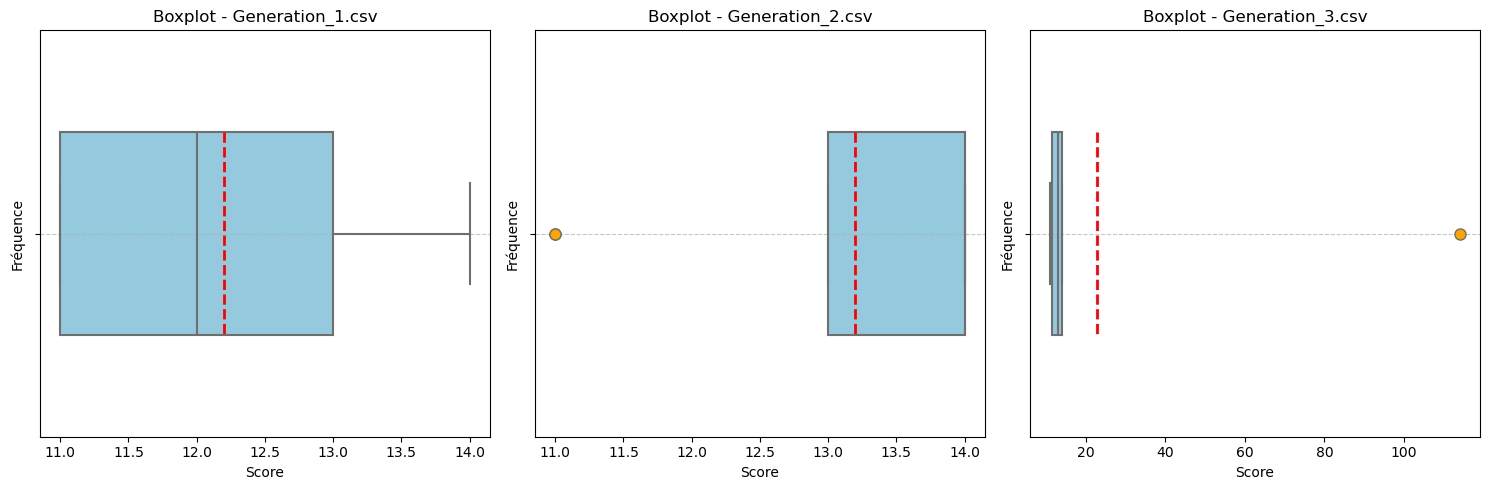


Statistiques globales :
count     30.000000
mean      16.066667
std       18.541535
min       11.000000
25%       11.000000
50%       13.000000
75%       14.000000
max      114.000000
Name: Score, dtype: float64


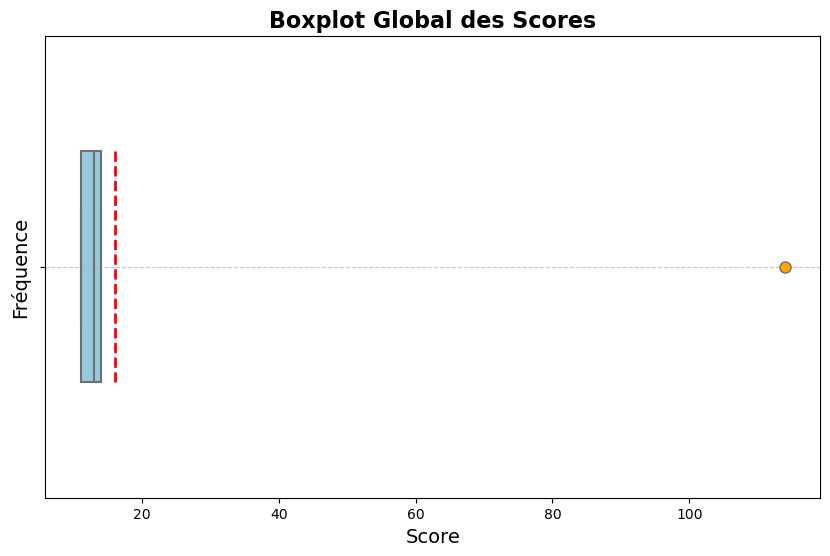

Les données combinées ont été sauvegardées dans 'merged_scores.csv'.


In [17]:
save_data_path = "../Save_Data"

if not os.path.exists("../Save_Data"):
    print(f"Le dossier '{save_data_path}' n'existe pas.")
else:
    print(f"Le dossier '{save_data_path}' existe.")

csv_files = glob.glob(os.path.join(save_data_path, "*.csv"))

all_scores = []

if csv_files:
    n_cols = 3  
    n_rows = (len(csv_files) + n_cols - 1) // n_cols  

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  

    for i, file in enumerate(csv_files):
        try:
            data = pd.read_csv(file)
            print(f"\nStatistiques pour le fichier : {file}")
            print(data["Score"].describe())

            boxplot(axes[i], data["Score"], title=f"Boxplot - {os.path.basename(file)}")

            all_scores.append(data["Score"])

        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {file}: {e}")

    for j in range(len(csv_files), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    if all_scores:
        merged_scores = pd.concat(all_scores, ignore_index=True)
        print("\nStatistiques globales :")
        print(merged_scores.describe())

        plt.figure(figsize=(10, 6))
        sns.boxplot(
            x=merged_scores,
            color="skyblue",
            width=0.5,
            showmeans=True,
            meanline=True,
            meanprops={"color": "red", "linestyle": "--", "linewidth": 2},
            flierprops={"marker": "o", "markerfacecolor": "orange", "markersize": 8},
        )
        plt.title("Boxplot Global des Scores", fontsize=16, fontweight="bold")
        plt.xlabel("Score", fontsize=14)
        plt.ylabel("Fréquence", fontsize=14)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

        merged_scores.to_csv("merged_scores.csv", index=False)
        print("Les données combinées ont été sauvegardées dans 'merged_scores.csv'.")
else:
    print("Aucun fichier CSV trouvé dans le dossier.")
